<a href="https://colab.research.google.com/github/amedekaemperor/PyTorch/blob/main/Intro_to_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import networkx as nx

## **Building a Graph**

### **Adding a node**

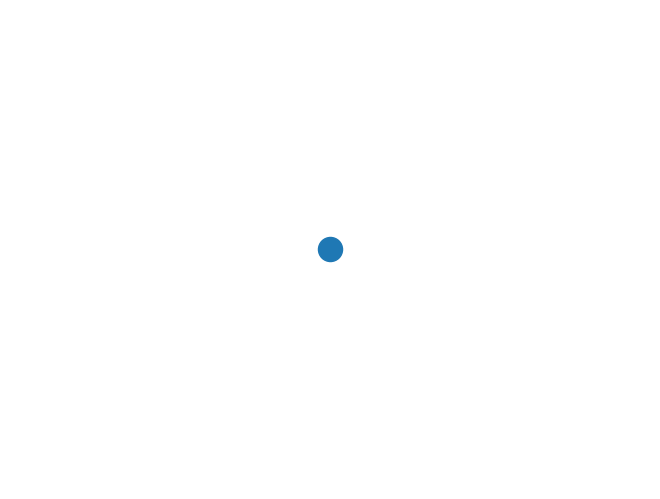

In [94]:
G = nx.Graph()
G.add_node(1)
nx.draw(G)

In [95]:
G.nodes(), G.edges()

(NodeView((1,)), EdgeView([]))

### **Adding more nodes**

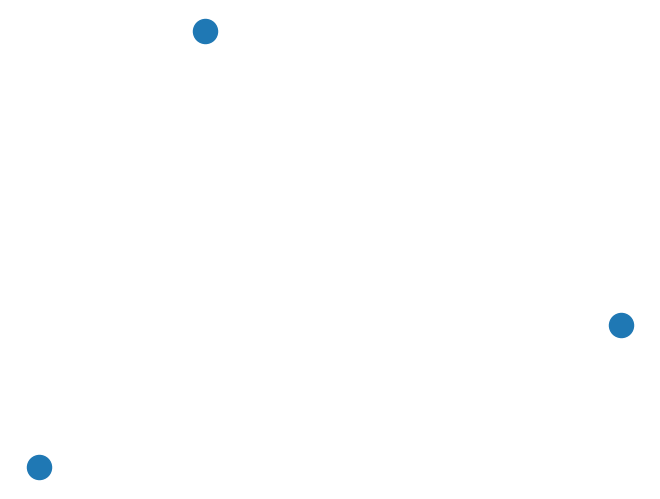

In [96]:
G.add_nodes_from([2,3])
nx.draw(G)

In [97]:
G.nodes(), G.edges()

(NodeView((1, 2, 3)), EdgeView([]))

### **Adding edges**

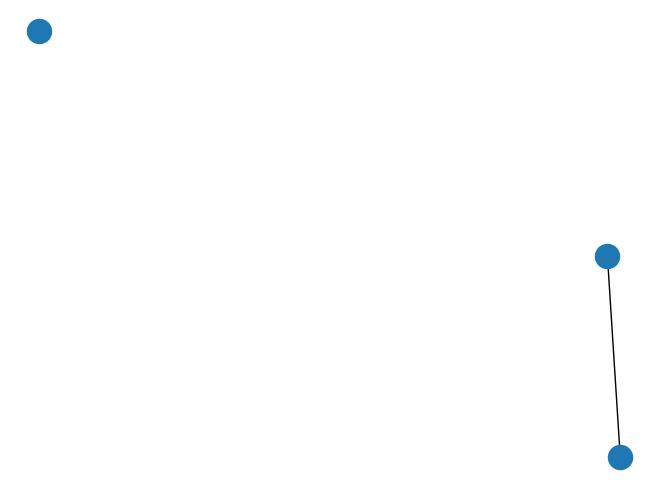

In [98]:
G.add_edge(1, 2)
nx.draw(G)

In [99]:
G.nodes(), G.edges()

(NodeView((1, 2, 3)), EdgeView([(1, 2)]))

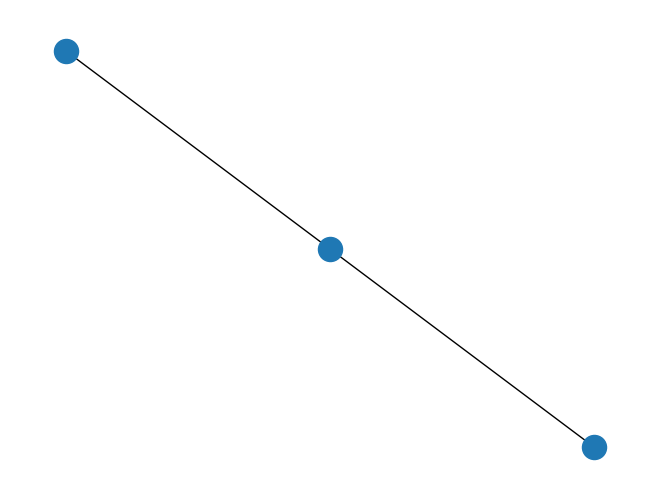

In [100]:
G.add_edge(2, 3)
nx.draw(G)

In [101]:
G.nodes(), G.edges()

(NodeView((1, 2, 3)), EdgeView([(1, 2), (2, 3)]))

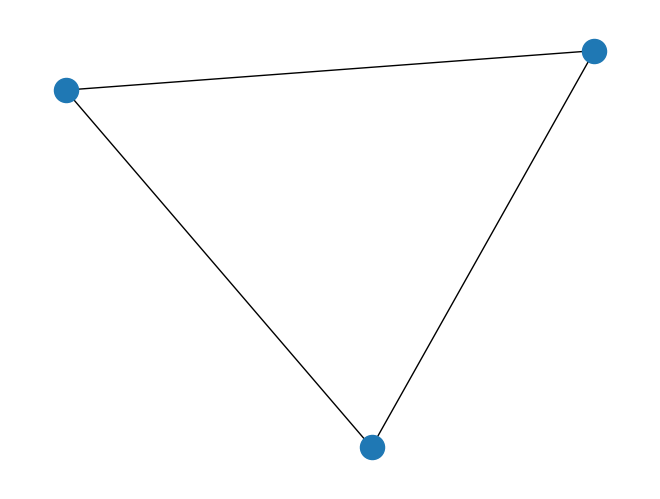

In [102]:
G.add_edge(3, 1)
nx.draw(G)

In [103]:
G.nodes(), G.edges()

(NodeView((1, 2, 3)), EdgeView([(1, 2), (1, 3), (2, 3)]))

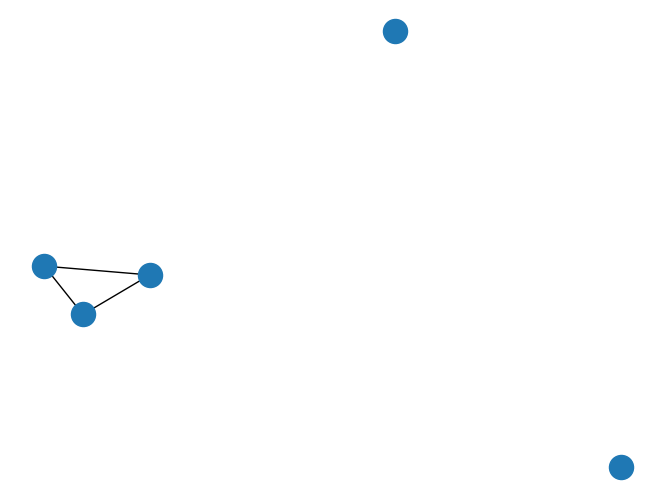

In [104]:
G.add_nodes_from([4,5])
nx.draw(G)

In [105]:
G.nodes(), G.edges()

(NodeView((1, 2, 3, 4, 5)), EdgeView([(1, 2), (1, 3), (2, 3)]))

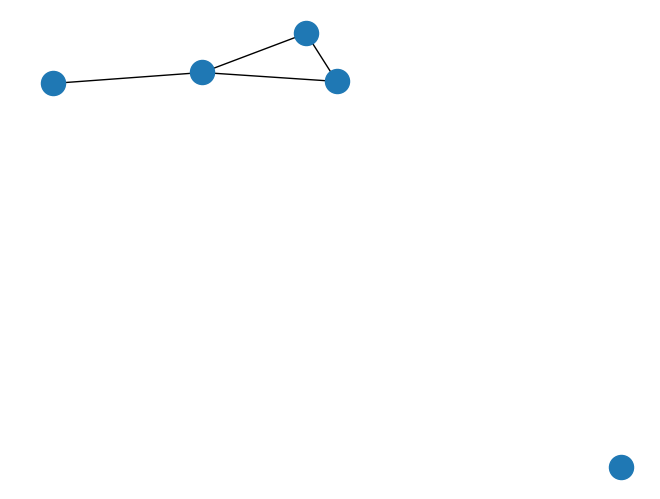

In [106]:
G.add_edge(4, 1)
nx.draw(G)

In [107]:
G.nodes(), G.edges()

(NodeView((1, 2, 3, 4, 5)), EdgeView([(1, 2), (1, 3), (1, 4), (2, 3)]))

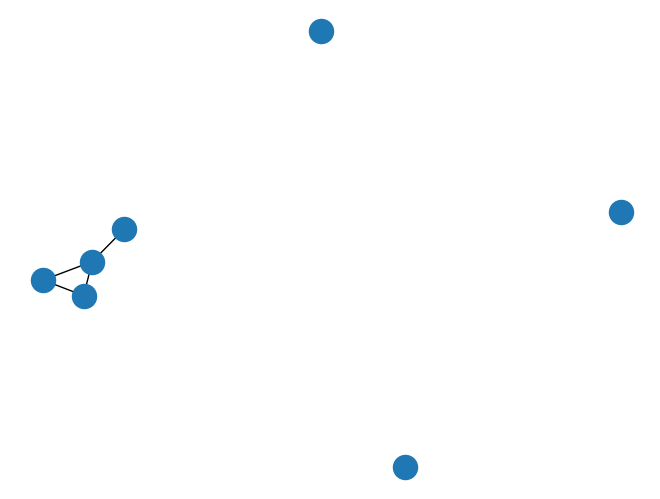

In [108]:
G.add_nodes_from([6,7])
nx.draw(G)

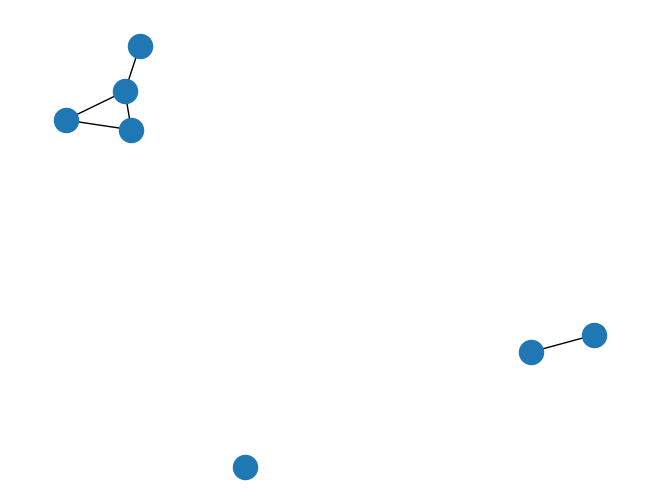

In [109]:
G.add_edge(5, 6)
nx.draw(G)

In [110]:
G.nodes(), G.edges()

(NodeView((1, 2, 3, 4, 5, 6, 7)),
 EdgeView([(1, 2), (1, 3), (1, 4), (2, 3), (5, 6)]))

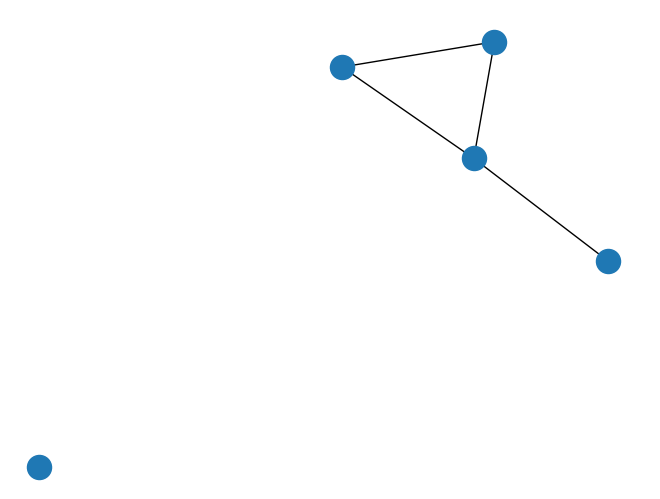

In [111]:
G.remove_nodes_from([5, 6])
nx.draw(G)

In [112]:
G.is_directed()

False

In [113]:
G.is_multigraph()

False

In [114]:
G.degree()

DegreeView({1: 3, 2: 2, 3: 2, 4: 1, 7: 0})

In [115]:
for noe in G.nodes():
    print(noe, G.degree(noe))

1 3
2 2
3 2
4 1
7 0


In [128]:
for noe in G.nodes():
    print(noe, list(G.neighbors(noe)))

1 [2, 3, 4]
2 [1, 3]
3 [2, 1]
4 [1]
7 []


In [132]:
import pandas as pd
adj = nx.adjacency_matrix(G).todense()
pd.DataFrame(adj, columns=G.nodes(), index=G.nodes())

,1,2,3,4,7
1,0,1,1,1,0
2,1,0,1,0,0
3,1,1,0,0,0
4,1,0,0,0,0
7,0,0,0,0,0


In [133]:
adj.diagonal()

array([0, 0, 0, 0, 0])

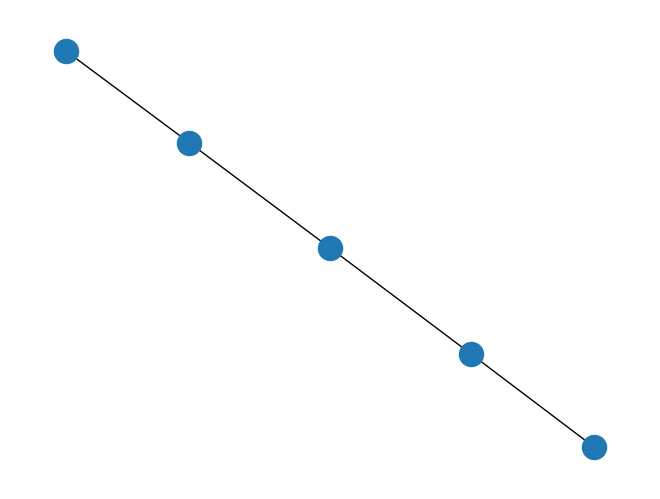

In [117]:
G1 = nx.path_graph(5)
nx.draw(G1)

[1, 2, 3] [(1, 2), (2, 3), (3, 1)]


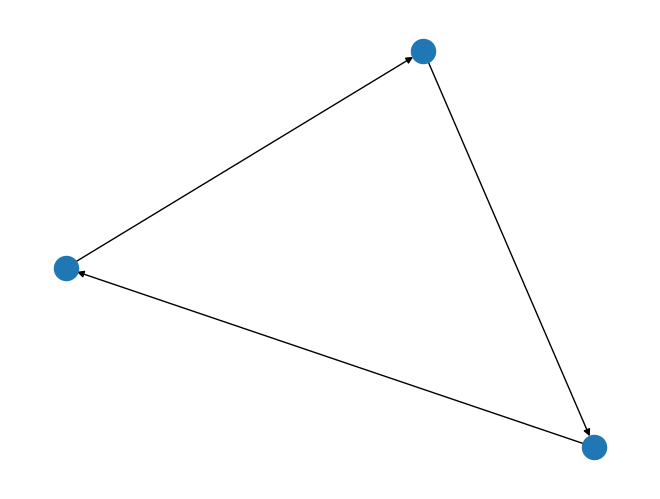

In [122]:
G2 = nx.DiGraph()
G2.add_edge(1, 2, weight=1)
G2.add_edge(2, 3, weight=2)
G2.add_edge(3, 1, weight=3)
print(G2.nodes(), G2.edges())
nx.draw(G2)

In [135]:
import pandas as pd
adj2 = nx.adjacency_matrix(G2).todense()
pd.DataFrame(adj2, columns=G2.nodes(), index=G2.nodes())

,1,2,3
1,0,1,0
2,0,0,2
3,3,0,0


[0, 1, 2, 3] [(0, 1), (1, 2), (1, 3), (2, 3), (2, 2), (3, 0)]


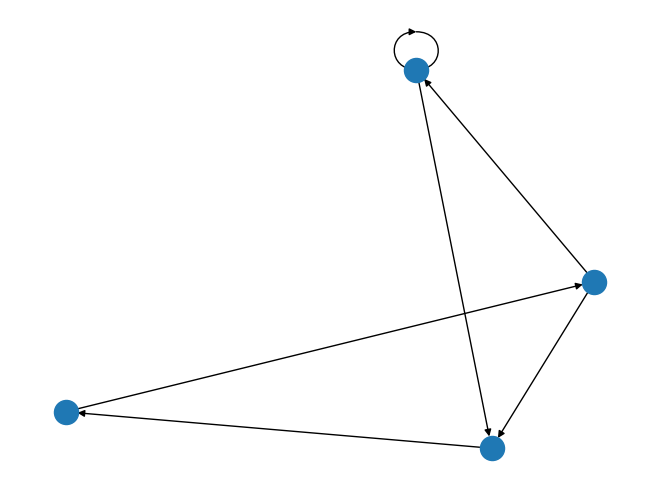

In [142]:
G3 = nx.MultiDiGraph()
G3.add_edge(0, 1, weight=1)
G3.add_edge(1, 2, weight=2)
G3.add_edge(2, 3)
G3.add_edge(3, 0, weight=4)
G3.add_edge(1, 3, weight=5)
G3.add_edge(2, 2, weight=6)
print(G3.nodes(), G3.edges())
nx.draw(G3)

In [143]:
import pandas as pd
adj3 = nx.adjacency_matrix(G3).todense()
pd.DataFrame(adj3, columns=G3.nodes(), index=G3.nodes())

,0,1,2,3
0,0,1,0,0
1,0,0,2,5
2,0,0,6,1
3,4,0,0,0


In [144]:
for noe in G3.nodes():
    print(noe, list(G3.neighbors(noe)))

0 [1]
1 [2, 3]
2 [3, 2]
3 [0]


In [145]:
nx.to_numpy_array(G3, nonedge=-1)

array([[-1,  1, -1, -1],
       [-1, -1,  2,  5],
       [-1, -1,  6,  1],
       [ 4, -1, -1, -1]])